## Objetivos

  - Apresentar o conceito de Regressão
  - Apresentar e utilizar algoritmo de Regressão linear
  - Apresentar e utilizar Regressão Polinomial
  - Apresentar e discutir a matriz de correlação
  - Apresentar uma intuição sobre métricas de avaliação (MSE, RMSE e $ R² $ )


  

## Começando

Sabemos que dentro de aprendizado supervisionado vamos trabalhar com dois tipos de problemas:

- [x]  Classificação - (Já conhecemos o KNN)
- [ ]  Regressão - (Objetivo de hoje)

### Uma intuição sobre problemas que envolvem cada um deles:

        Classificação --> Resultados discretos (categóricos).
        Regressão --> Resultados numéricos e contínuos.


### Regressão linear

É uma técnica que consiste em representar um conjunto de dados por meio de uma reta.


    Na matemática aprendemos que a equação de uma reta é:

$$
Y = A + BX \\
$$
A e B são constantes que determinam a posição e inclinação da reta. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão linear é:

$$
Y_{predito} = \beta_o + \beta_1X \\
$$

$ \beta_o $ e $ \beta_1 $ são parâmetros que determinam o peso e bias da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.

![reta](/aulas/lab03/reta.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/reta.png?raw=1">

Essa ideia se estende para mais de um parâmetro independente, mas nesse caso não estamos associando a uma reta e sim a um plano ou hiperplano:

$$
Y_{predito} = \beta_o + \beta_1X_1 + \beta_2X_2 + ... + \beta_nX_n\\
$$

![plano](/aulas/lab03/plano.png)
<img src="https://github.com/arnaldojr/DisruptiveArchitectures/blob/master/material/aulas/lab03/plano.png?raw=1" width="450">

Em outras palavras, modelos de regressão linear são intuitivos, fáceis de interpretar e se ajustam aos dados razoavelmente bem em muitos problemas.


## Bora lá!!

Vamos juntos realizar um projeto, do começo ao fim, usando regressão.



## Definição do problema

Vamos trabalhar com um dataset com informações coletadas U.S Census Service (tipo IBGE americano) sobre habitação na área de Boston Mass.

ref: https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html

informação importante sobre o significado de cada um dos atributos

7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per $10,000
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in $1000's


    Queremos desenvolver um modelo capaz de predizer o valor de um imovel em Boston.


### Desafio 1

Do ponto de vista de machine learning, que problema é esse:

    Aprendizado supervisionado, não-supervisionado ou aprendizado por reforço?

R: Trata-se de aprendizado supervisionado.    

    Classificação, regressão ou clusterização?

R: Trata-se de aprendizado supervisionado baseado em regressão.


In [ ]:
# Inicializção das bibliotecas
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt


O scikit-learn possui diversos dataset em seu banco de dados, um deles é o dataset que vamos utilizar hoje.

faça o import direto usando ***sklearn.datasets***

caso queira, você pode fazer o downlod do dataset direto do site e importar em seu projeto.



In [ ]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

#para conhecer o que foi importado do dataset
boston_dataset.keys()


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [ ]:
# vamos carregar no pandas apenas data com os dados e "feature_names" com os nomes dos atributos

df = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
#vamos adicionar mais uma coluna ao nosso dataframe com o target (alvo que vamos fazer a predição)
df['MEDV'] = boston_dataset.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Desafio 2

Use os metodos info() e describe() para exibir as informações do dataframe e responda:

Existe dados faltantes?

Qual o tamanho do dataset, quantas linhas e quantas colunas?



In [ ]:
#R1: Existem 4048 dados faltantes no dataset.
#R2 O dataset possui 1012 linhas e 11 colunas.

import pandas as pd

# URL do dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Carregar o dataset
df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
# 'sep' é o delimitador de colunas, '\s+' indica espaços em branco
# 'skiprows' pula as primeiras 22 linhas que não contêm dados
# 'header=None' indica que o arquivo não tem linha de cabeçalho

# Verificar se existem dados faltantes no dataset
dados_faltantes = df.isnull().sum().sum()

# Obter o número de linhas e colunas no dataset
num_linhas, num_colunas = df.shape

# Imprimir resultados
print("Existem {} dados faltantes no dataset.".format(dados_faltantes))
print("O dataset possui {} linhas e {} colunas.".format(num_linhas, num_colunas))


Existem 4048 dados faltantes no dataset.
O dataset possui 1012 linhas e 11 colunas.


In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Desafio 3

Aplique os métodos que achar conveniente (vimos algumas opções na última aula) para visualizar os dados de forma gráfica.


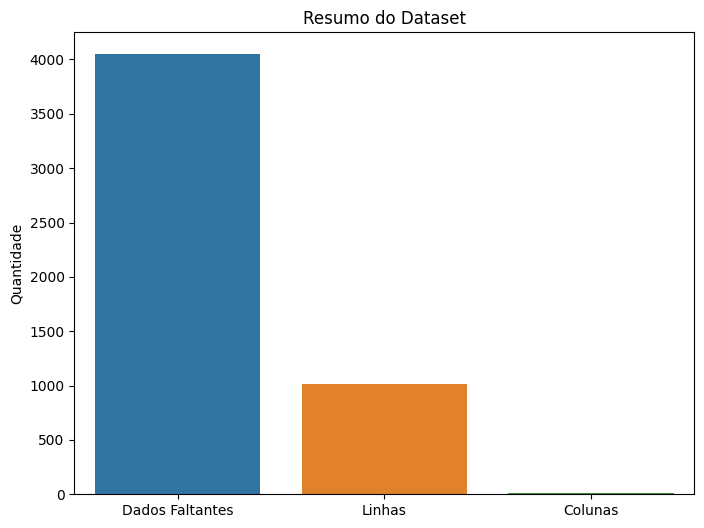

In [ ]:
## Sua resposta e seus gráficos para análisar..


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# URL do dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Carregar o dataset
df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)

# Verificar se existem dados faltantes no dataset
dados_faltantes = df.isnull().sum().sum()

# Obter o número de linhas e colunas no dataset
num_linhas, num_colunas = df.shape

# Gráfico de barras para dados faltantes
plt.figure(figsize=(8, 6))
sns.barplot(x=['Dados Faltantes', 'Linhas', 'Colunas'], y=[dados_faltantes, num_linhas, num_colunas])
plt.ylabel('Quantidade')
plt.title('Resumo do Dataset')
plt.show()





<AxesSubplot:>

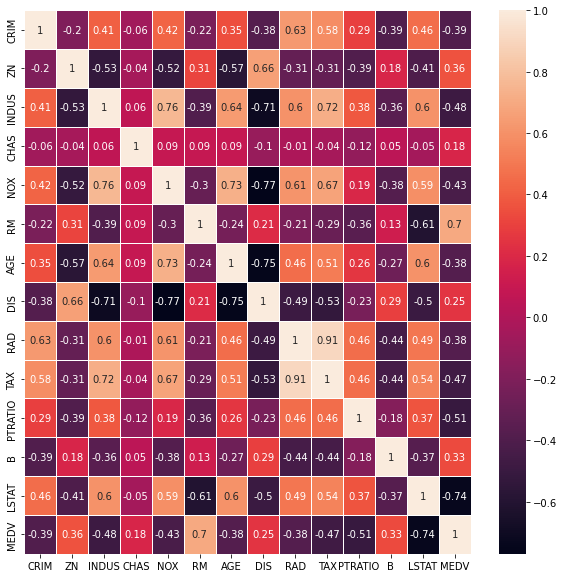

In [ ]:
#Vamos explorar um pouco uma matrix de correlação

import seaborn as sns
correlation_matrix = df.corr().round(2)

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

### Desafio 4

Analisando a matriz de correlação acima responda:

Qual feature possue a maior correlação ***positiva*** com o target?

Qual feature possue a maior correlação ***negativa*** com o target?


<AxesSubplot:xlabel='RM', ylabel='MEDV'>

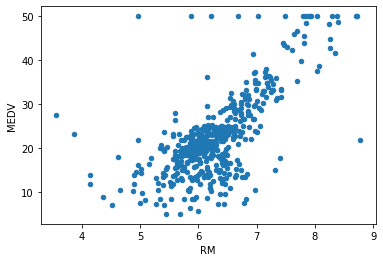

In [ ]:
df.plot.scatter('RM', 'MEDV')

#R4.1: A feature TAX/RAD apresenta a maior correlação positiva com o target;

#R4.2: A feature DIZ/NOX apresenta a maior correlação negativa com o targe;

<AxesSubplot:xlabel='LSTAT', ylabel='MEDV'>

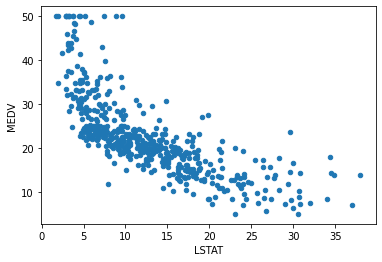

In [ ]:
df.plot.scatter('LSTAT', 'MEDV')

## PARE!!!

A análise feita no desafio 2 e 3 é uma das etapas mais importantes. Caso você tenha pulado essa etapa, volte e faça suas análises.

Com essa etapa concluída, vamos criar um sub-dataset com os atributos que serão utilizados.


In [ ]:
# Vamos treinar nosso modelo com 2 dois atributos independentes
# para predizer o valor de saida
X = df[['LSTAT', 'RM']]   ### teste com duas entradas
#X = df[['RM']]            ### teste com uma entrada
#X = df.drop(['MEDV'], axis=1)     ### teste com todas as entradas

Y = df['MEDV']
print(f"Formato das tabelas de dados {X.shape} e saidas {Y.shape}")

Formato das tabelas de dados (506, 2) e saidas (506,)


## Dividindo os dados em conjunto de treinamento e de testes

Dividir nosso dataset em dois conjuntos de dados.
    
    Treinamento - Representa 80% das amostras do conjunto de dados original,
    Teste - com 20% das amostras

Vamos escolher aleatoriamente algumas amostras do conjunto original. Isto pode ser feito com Scikit-Learn usando a função ***train_test_split()***


***scikit-learn*** Caso ainda não tenha instalado, no terminal digite:
- pip install scikit-learn



In [ ]:
# Separamos 20% para o teste
from sklearn.model_selection import train_test_split

X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=0.2)

print(X_treino.shape)
print(X_teste.shape)
print(Y_treino.shape)
print(Y_teste.shape)

NameError: ignored

In [ ]:
#Primeiras linhas do dataframe
X_treino.head()

NameError: ignored

In [ ]:
Y_treino.head()

209    20.0
310    16.1
360    25.0
79     20.3
291    37.3
Name: MEDV, dtype: float64

## Chegou a hora de aplicar o modelo preditivo

Treinar um modelo no python é simples se usar o Scikit-Learn.
Treinar um modelo no Scikit-Learn é simples: basta criar o regressor, e chamar o método fit().

Uma observação sobre a sintaxe dos classificadores do `scikit-learn`
- O método `fit(X,Y)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de aprendizado, e um array Y contendo as saídas esperadas do classificador, seja na forma de texto ou de inteiros
- O método `predict(X)` recebe uma matriz ou dataframe X onde cada linha é uma amostra de teste, retornando um array de classes



In [ ]:
# Importa a biblioteca
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Cria o modelo de regressão
lin_model = LinearRegression()

# Cria o modelo de machine learning
lin_model.fit(X_treino, Y_treino)




LinearRegression()

Pronto!! bora testar se esta funcionando....


In [ ]:
# Para obter as previsões, basta chamar o método predict()
y_teste_predito = lin_model.predict(X_teste)
print("Predição usando regressão, retorna valores continuos: {}".format(y_teste_predito))


Predição usando regressão, retorna valores continuos: [27.78116886 16.26183507 23.44015871 18.3282106  24.078629   23.05830511
 17.20596108 26.55333901 27.29465033 12.08763269 21.03585378 21.83829692
 28.32018637 24.77547133 30.89952717 29.1843249  20.65194401 26.20774337
 20.89373715 30.24761832 37.55250921 19.26971857 28.14794273 24.12901374
 29.39194699 21.30136803 19.05738983 20.33195147 31.28902138 18.7942289
 21.75066712 19.46186472 17.07638469 22.94060637 16.72256778 29.9768014
 27.27470683 20.46317244 21.65543256 20.35973369 21.46822532 12.96054581
 11.31023591 17.62605536 21.66027072 29.63635815 17.04413491 22.30658657
 21.44084101 33.38456927 28.12945767 36.51060065 28.13081707 20.55514342
 16.33219577 27.24120865  9.26654829 31.49250893 18.067707    0.40299741
 17.11051987 14.37542579 18.11218451 21.49691096 17.48697175 12.74074381
 19.45037134 22.93711054 28.29503071 19.49300104 18.94201196 26.85663797
 27.535026   38.85542517 29.17836814 19.5983952  36.91921008 30.82287671

In [ ]:
# vamos avaliar os parametros do nosso modelo
print('(A) Intercepto: ', lin_model.intercept_)
print('(B) Inclinação: ', lin_model.coef_)
if len(lin_model.coef_)>1:
    print('Nossa equação é: Y_pred = {} + {} * X_LSTAT + {} * X_RM'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2),lin_model.coef_[1].round(2)) )
else:
        print('Nossa equação é: Y_pred = {} + {} * X_LSTAT'.format(lin_model.intercept_.round(2),lin_model.coef_[0].round(2)))


(A) Intercepto:  2.4355315463718874
(B) Inclinação:  [-0.67611155  4.58198354]
Nossa equação é: Y_pred = 2.44 + -0.68 * X_LSTAT + 4.58 * X_RM


Text(0, 0.5, 'Valor Predito')

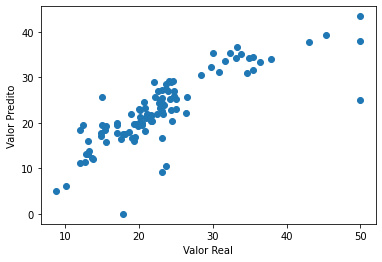

In [ ]:
plt.scatter(Y_teste,y_teste_predito)
plt.xlabel('Valor Real')
plt.ylabel('Valor Predito')

## Avaliando o modelo treinado

Vamos colocar alguns valores e ver a predição do classificador.

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
import numpy as np

print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_teste_predito - Y_teste)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(Y_teste, y_teste_predito))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(Y_teste, y_teste_predito))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(Y_teste, y_teste_predito)))
print("R2-score: %.2f" % r2_score(y_teste_predito , Y_teste) )

Soma dos Erros ao Quadrado (SSE): 2948 
Erro Quadrático Médio (MSE): 28.90
Erro Médio Absoluto (MAE): 4.05
Raiz do Erro Quadrático Médio (RMSE): 5.38 
R2-score: 0.42


### Desafio 5

Refaça o notebook substituindo o algoritmo de regressão linear por outro algoritmo de regressão e compare os resultados obtidos.

Sugestão de alguns algoritmos de ML para problemas de regressão:

| Nome | Vantagem | Desvantagem | Exemplo sklearn |
|:---:|:---:|:---:|:---:|
| Regressão Linear | Fácil de entender e implementar | Pode não ser adequado para problemas mais complexos | from sklearn.linear_model import LinearRegression<br><br><br>model = LinearRegression()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Árvores de decisão | Fácil de entender e visualizar | Pode levar a overfitting se a árvore for muito grande | from sklearn.tree import DecisionTreeRegressor<br><br><br>model = DecisionTreeRegressor()<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Random Forest | Mais robusto e geralmente mais preciso do que uma única árvore de decisão | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import RandomForestRegressor<br><br><br>model = RandomForestRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Support Vector Regression (SVR) | Lida bem com dados multidimensionais e não lineares | Pode ser difícil de escolher o kernel correto e ajustar os hiperparâmetros | from sklearn.svm import SVR<br><br><br>model = SVR(kernel='rbf')<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
| Gradient Boosting | Preciso e lida bem com dados multidimensionais e não lineares | Pode ser mais lento e mais difícil de ajustar | from sklearn.ensemble import GradientBoostingRegressor<br><br><br>model = GradientBoostingRegressor(n_estimators=100)<br>model.fit(X, y)<br>prediction = model.predict([X_teste]) |
|  |  |  |  |




In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from urllib.request import urlopen

# URL do dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Lendo os dados diretamente da URL usando pandas e especificando os nomes das colunas
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
boston_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None, names=column_names)

# Imputando valores NaN na variável alvo 'MEDV' usando a média dos valores não ausentes
imputer = SimpleImputer(strategy='mean')
boston_df['MEDV'] = imputer.fit_transform(boston_df[['MEDV']])

# Removendo linhas com valores NaN nas colunas de interesse ('CHAS', 'NOX', 'RM')
boston_df_clean = boston_df.dropna(subset=['CHAS', 'NOX', 'RM'])

# Separando os recursos (features) e a variável alvo
X = boston_df_clean[['CHAS', 'NOX', 'RM']]
y = boston_df_clean['MEDV']

# Dividindo o conjunto de dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=0)

# Criando o modelo de árvore de decisão
modelo_arvore_decisao = DecisionTreeRegressor()

# Treinando o modelo
modelo_arvore_decisao.fit(X_treino, y_treino)

# Fazendo previsões no conjunto de teste
previsoes = modelo_arvore_decisao.predict(X_teste)

# Calculando o erro (Erro Quadrático Médio)
erro = mean_squared_error(y_teste, previsoes)
print(f'Erro Quadrático Médio: {erro}')

# Fazendo uma única previsão para um exemplo específico
exemplo = [[0.0, 0.0, 0.0]]  # Substitua esses valores pelos valores desejados para 'CHAS', 'NOX' e 'RM'
previsao_exemplo = modelo_arvore_decisao.predict(exemplo)
print(f'Previsão para o exemplo: {previsao_exemplo}')


IndexError: ignored

## Regressão Polinomial

$$
Y = A + BX + C X² \\
$$
A, B e C são constantes que determinam a posição e inclinação da curva, o 2 indica o grau do polinômio. Para cada valor de X temos um Y associado.

    Em machine learning aprendemos que uma Regressão Polinomial é:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² \\
$$

$ \beta_o $ , $ \beta_1 $ e $ \beta_2 $ são parâmetros que determinam o peso da rede. Para cada entrada $ X $ temos um $ Y_{predito} $ aproximado predito.


Essa ideia se estende para polinômio de graus maiores:

$$
Y_{predito} = \beta_o + \beta_1X + \beta_2X² + ... + \beta_nX^n\\
$$



Soma dos Erros ao Quadrado (SSE): 602124 
Erro Quadrático Médio (MSE): 20070.81
Erro Médio Absoluto (MAE): 104.66
Raiz do Erro Quadrático Médio (RMSE): 141.67 
R2-score: 0.55


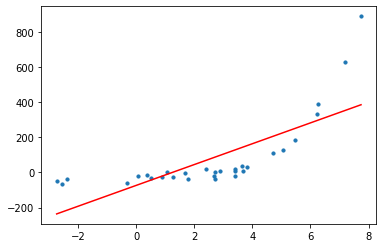

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# importa feature polinomial
from sklearn.preprocessing import PolynomialFeatures

#####----------- vou gerar alguns numeros aleatórios ------------------

#gerando numeros aleatorios, apenas para este exemplo
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3)+ 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)

# ajuste nos dados, pois estamos trabalhando com a numpy
x = x[:, np.newaxis]
y = y[:, np.newaxis]
####---------------pronto já temos os dados para treinar -------------


#----É aqui que o seu código muda ------------------------------------

# Chama a função definindo o grau do polinomio e aplica o modelo

grau_poly = 1
polynomial_features= PolynomialFeatures(degree = grau_poly)
x_poly = polynomial_features.fit_transform(x)

#----Pronto agora é tudo como era antes, com regressão linear


model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

# Métrica de avaliação do modelo
print("Soma dos Erros ao Quadrado (SSE): %2.f " % np.sum((y_poly_pred - y)**2))
print("Erro Quadrático Médio (MSE): %.2f" % mean_squared_error(y,y_poly_pred))
print("Erro Médio Absoluto (MAE): %.2f" % mean_absolute_error(y, y_poly_pred))
print ("Raiz do Erro Quadrático Médio (RMSE): %.2f " % np.sqrt(mean_squared_error(y, y_poly_pred)))
print("R2-score: %.2f" % r2_score(y,y_poly_pred) )


plt.scatter(x, y, s=10)
# ordena os valores de x antes de plotar
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)

plt.plot(x, y_poly_pred, color='r')
plt.show()

### Desafio 6

Faça uma função que calcula a regressão polinomial (basicamente colocar o codigo acima em uma função), agora faça um código que chama essa função alterando o grau do polinomio de 2 até 10, basicamente um loop for que chama a função criada.

Análise os resultados obtidos e determine qual o melhor grau polinomio do seu modelo.

Grau do Polinômio: 2
Soma dos Erros ao Quadrado (SSE): 140651.57
Erro Quadrático Médio (MSE): 4688.39
Erro Médio Absoluto (MAE): 57.64
Raiz do Erro Quadrático Médio (RMSE): 68.47
R2-score: 0.90




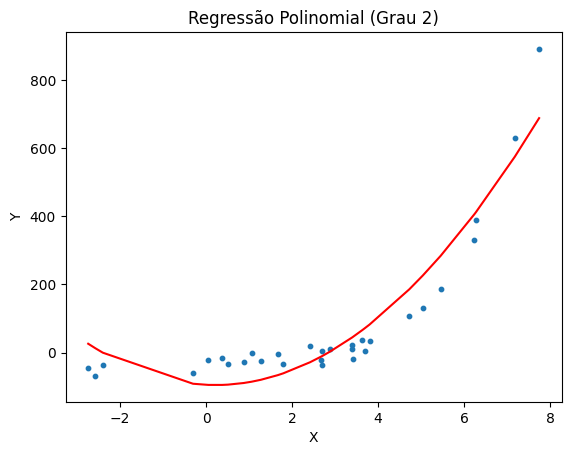

Grau do Polinômio: 3
Soma dos Erros ao Quadrado (SSE): 1195418.38
Erro Quadrático Médio (MSE): 39847.28
Erro Médio Absoluto (MAE): 128.39
Raiz do Erro Quadrático Médio (RMSE): 199.62
R2-score: 0.11




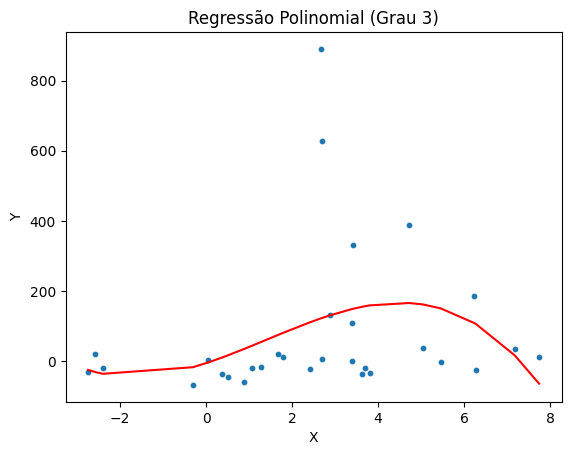

Grau do Polinômio: 4
Soma dos Erros ao Quadrado (SSE): 1138290.04
Erro Quadrático Médio (MSE): 37943.00
Erro Médio Absoluto (MAE): 129.67
Raiz do Erro Quadrático Médio (RMSE): 194.79
R2-score: 0.16




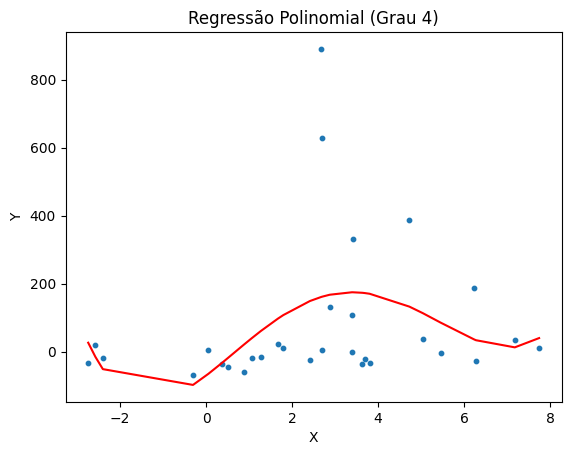

Grau do Polinômio: 5
Soma dos Erros ao Quadrado (SSE): 1138079.83
Erro Quadrático Médio (MSE): 37935.99
Erro Médio Absoluto (MAE): 130.21
Raiz do Erro Quadrático Médio (RMSE): 194.77
R2-score: 0.16




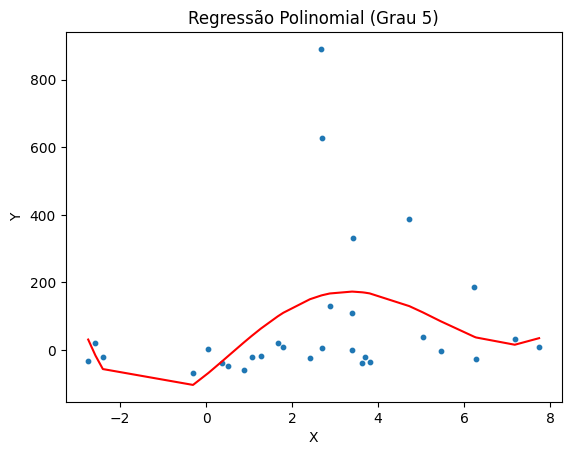

Grau do Polinômio: 6
Soma dos Erros ao Quadrado (SSE): 1105703.39
Erro Quadrático Médio (MSE): 36856.78
Erro Médio Absoluto (MAE): 127.48
Raiz do Erro Quadrático Médio (RMSE): 191.98
R2-score: 0.18




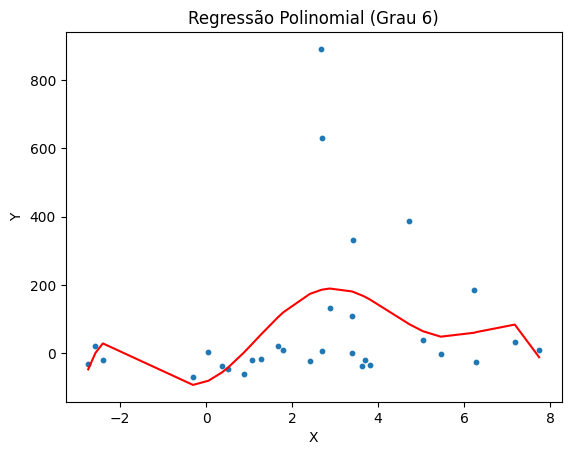

Grau do Polinômio: 7
Soma dos Erros ao Quadrado (SSE): 1105407.28
Erro Quadrático Médio (MSE): 36846.91
Erro Médio Absoluto (MAE): 128.10
Raiz do Erro Quadrático Médio (RMSE): 191.96
R2-score: 0.18




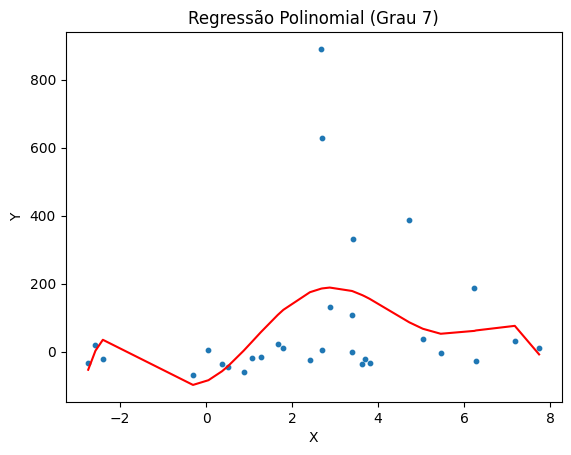

Grau do Polinômio: 8
Soma dos Erros ao Quadrado (SSE): 1060391.07
Erro Quadrático Médio (MSE): 35346.37
Erro Médio Absoluto (MAE): 125.65
Raiz do Erro Quadrático Médio (RMSE): 188.01
R2-score: 0.21




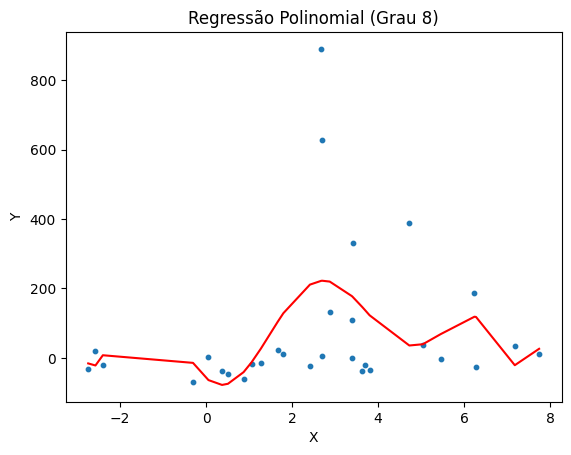

Grau do Polinômio: 9
Soma dos Erros ao Quadrado (SSE): 1048102.52
Erro Quadrático Médio (MSE): 34936.75
Erro Médio Absoluto (MAE): 129.19
Raiz do Erro Quadrático Médio (RMSE): 186.91
R2-score: 0.22




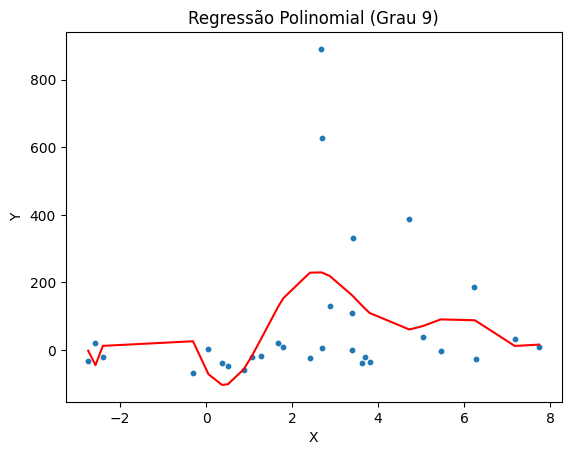

Grau do Polinômio: 10
Soma dos Erros ao Quadrado (SSE): 973968.59
Erro Quadrático Médio (MSE): 32465.62
Erro Médio Absoluto (MAE): 120.36
Raiz do Erro Quadrático Médio (RMSE): 180.18
R2-score: 0.28




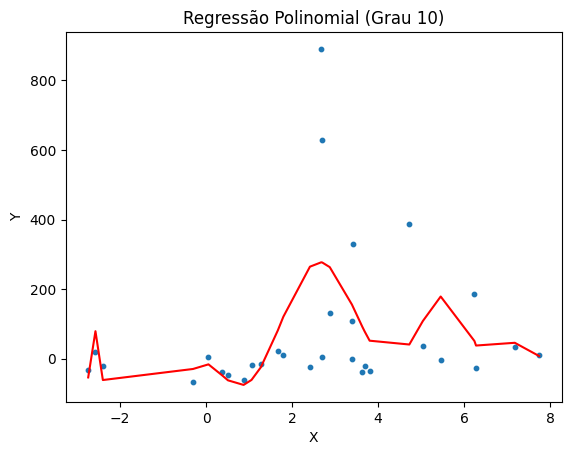

   Grau do Polinômio         SSE       MSE     MAE    RMSE  R2-score
0                  2   140651.57   4688.39   57.64   68.47      0.90
1                  3  1195418.38  39847.28  128.39  199.62      0.11
2                  4  1138290.04  37943.00  129.67  194.79      0.16
3                  5  1138079.83  37935.99  130.21  194.77      0.16
4                  6  1105703.39  36856.78  127.48  191.98      0.18
5                  7  1105407.28  36846.91  128.10  191.96      0.18
6                  8  1060391.07  35346.37  125.65  188.01      0.21
7                  9  1048102.52  34936.75  129.19  186.91      0.22
8                 10   973968.59  32465.62  120.36  180.18      0.28


In [ ]:
# Segundo a análise de dados efetuada, o melhor polinômio é o de grau 2, levando-se em conta que seu R2 Score demonstra que ele representa o modelo
# que melhor se ajuda se ajusta aos dados, conforme a planilha abaixo. Tal constatação é endossada pelo fato de que seus erros quadrátricos médios e erros médios absolutos também são
# mais baixos comparativamente aos demais.


#   Grau do Polinômio         SSE       MSE     MAE    RMSE  R2-score
0                  2   140651.57   4688.39   57.64   68.47      0.90
1                  3  1195418.38  39847.28  128.39  199.62      0.11
2                  4  1138290.04  37943.00  129.67  194.79      0.16
3                  5  1138079.83  37935.99  130.21  194.77      0.16
4                  6  1105703.39  36856.78  127.48  191.98      0.18
5                  7  1105407.28  36846.91  128.10  191.96      0.18
6                  8  1060391.07  35346.37  125.65  188.01      0.21
7                  9  1048102.52  34936.75  129.19  186.91      0.22
8                 10   973968.59  32465.62  120.36  180.18      0.28

import operator
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures

def regressao_polinomial(x, y, grau_poly=1):
    # Transforma os dados para a forma polinomial
    polynomial_features = PolynomialFeatures(degree=grau_poly)
    x_poly = polynomial_features.fit_transform(x)

    # Aplica a regressão linear
    model = LinearRegression()
    model.fit(x_poly, y)
    y_poly_pred = model.predict(x_poly)

    # Métricas de avaliação do modelo
    sse = np.sum((y_poly_pred - y) ** 2)
    mse = mean_squared_error(y, y_poly_pred)
    mae = mean_absolute_error(y, y_poly_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_poly_pred)

    return sse, mse, mae, rmse, r2, y_poly_pred

# Gerando números aleatórios
np.random.seed(42)
x = 2 - 3 * np.random.normal(0, 1, 30)
y = x - 3 * (x ** 2) + 0.8 * (x ** 3) + 0.2 * (x ** 4) + np.random.normal(-20, 20, 30)
x = x[:, np.newaxis]
y = y[:, np.newaxis]

# Loop for para calcular a regressão polinomial para diferentes graus
for grau in range(2, 11):
    sse, mse, mae, rmse, r2, y_poly_pred = regressao_polinomial(x, y, grau)
    print(f"Grau do Polinômio: {grau}")
    print(f"Soma dos Erros ao Quadrado (SSE): {sse:.2f}")
    print(f"Erro Quadrático Médio (MSE): {mse:.2f}")
    print(f"Erro Médio Absoluto (MAE): {mae:.2f}")
    print(f"Raiz do Erro Quadrático Médio (RMSE): {rmse:.2f}")
    print(f"R2-score: {r2:.2f}")
    print("\n")

    plt.scatter(x, y, s=10)
    sort_axis = operator.itemgetter(0)
    sorted_zip = sorted(zip(x, y_poly_pred), key=sort_axis)
    x, y_poly_pred = zip(*sorted_zip)
    plt.plot(x, y_poly_pred, color='r')
    plt.title(f'Regressão Polinomial (Grau {grau})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.show()



# Dados fornecidos
dados = {
    'Grau do Polinômio': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'SSE': [140651.57, 1195418.38, 1138290.04, 1138079.83, 1105703.39, 1105407.28, 1060391.07, 1048102.52, 973968.59],
    'MSE': [4688.39, 39847.28, 37943.00, 37935.99, 36856.78, 36846.91, 35346.37, 34936.75, 32465.62],
    'MAE': [57.64, 128.39, 129.67, 130.21, 127.48, 128.10, 125.65, 129.19, 120.36],
    'RMSE': [68.47, 199.62, 194.79, 194.77, 191.98, 191.96, 188.01, 186.91, 180.18],
    'R2-score': [0.90, 0.11, 0.16, 0.16, 0.18, 0.18, 0.21, 0.22, 0.28]
}

# Criar um DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Salvar o DataFrame como um arquivo CSV
df.to_csv('resultados_polinomios.csv', index=False)

# Imprimir o DataFrame (opcional)
print(df)




